In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
def plot_sample(index):
    plt.figure(figsize = (10, 1))
    plt.imshow(X_train[index])
    

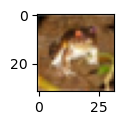

In [5]:
plot_sample(0)

In [6]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']

In [7]:
classes[y_train[3][0]]

'deer'

In [8]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [9]:
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=10 , dtype='float32')
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=10 , dtype='float32')

In [11]:
%%timeit

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32, 32,3)),
    keras.layers.Dense(3000, activation=('relu')),
    keras.layers.Dense(3000, activation=('relu')),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD', loss='categorical_crossentropy',metrics = ['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 129s 82ms/step - loss: 1.8078 - accuracy: 0.3568
Epoch 2/50
1563/1563 [==============================] - 127s 81ms/step - loss: 1.6159 - accuracy: 0.4299
Epoch 3/50
 217/1563 [===>..........................] - ETA: 2:01 - loss: 1.5587 - accuracy: 0.4539

KeyboardInterrupt: 